 ## INTRODUCTION ABOUT THE DATASET

The Pima Indian Diabetes dataset is a popular dataset from the UCI Machine Learning Repository. 
It contains medical data of female patients of Pima Indian heritage aged 21 years and older. 
The goal is to predict whether a patient is likely to develop diabetes based on diagnostic measurements
such as glucose level, BMI, insulin level, age, and number of pregnancies.
This dataset is widely used for binary classification tasks and helps in understanding the role of early medical indicators in predicting diabetes

## PROBLEM STATEMENT

Early detection of diabetes can significantly improve treatment outcomes and reduce healthcare costs. The challenge is to build a machine learning model that can accurately predict whether a person is diabetic or not based on the given health parameters.

The prediction is binary:
- 0: Non-diabetic
- 1: Diabetic

In [57]:
#IMPORTING ALL THE LIBRARIES
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#MODEL
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#PREPROCESSING 
from sklearn.preprocessing import StandardScaler, LabelEncoder , OneHotEncoder
from sklearn.impute import SimpleImputer


#EVALUATION
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV , cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score 


## VISUALIZING THE DATA

In [2]:
df = pd.read_csv('Dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# ALL THE DATA IS IN NUMERIC FORM SO NO NEED TO ENCODE OR CHANGE ITS DATA TYPE

In [5]:
# Now Checking if there is any null , duplicate values in the data
df.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# There is no null or duplicated values so no need to remove it

In [8]:
# Visualizing the outcome data that is it balanced or imbalanced 
Outcome_count = df["Outcome"].value_counts()
Outcome_count

Outcome
0    500
1    268
Name: count, dtype: int64

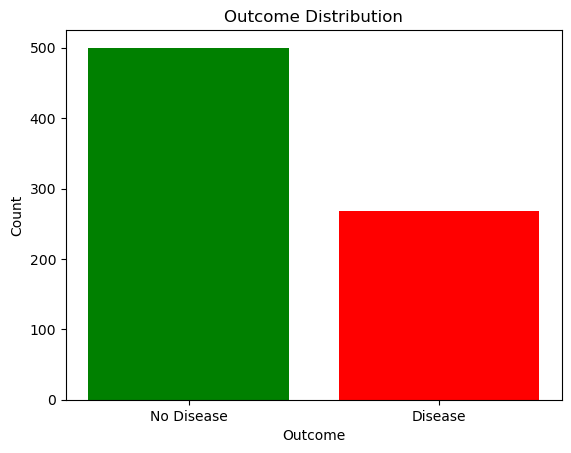

In [9]:
colors = ["green", "red"]
plt.bar(Outcome_count.index, Outcome_count.values , color=colors)
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks([0,1], ["No Disease", "Disease"])
plt.title("Outcome Distribution")
plt.show()


In [10]:
# The Data is a little bit imbalanced so later we can handle it through class weight in model training 

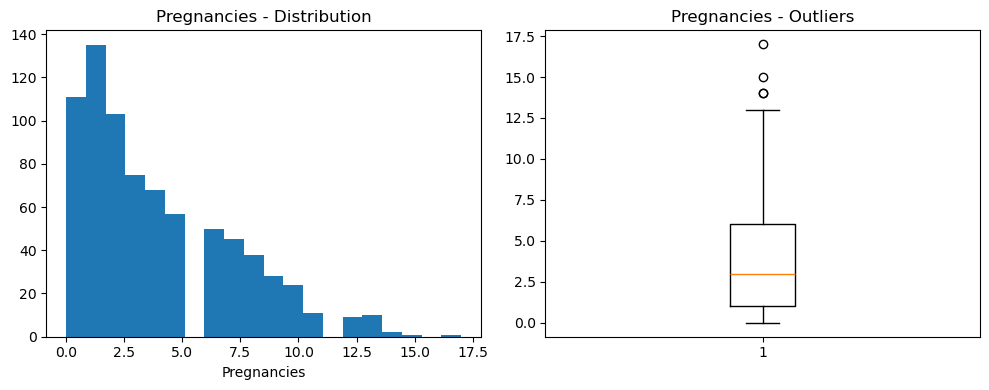

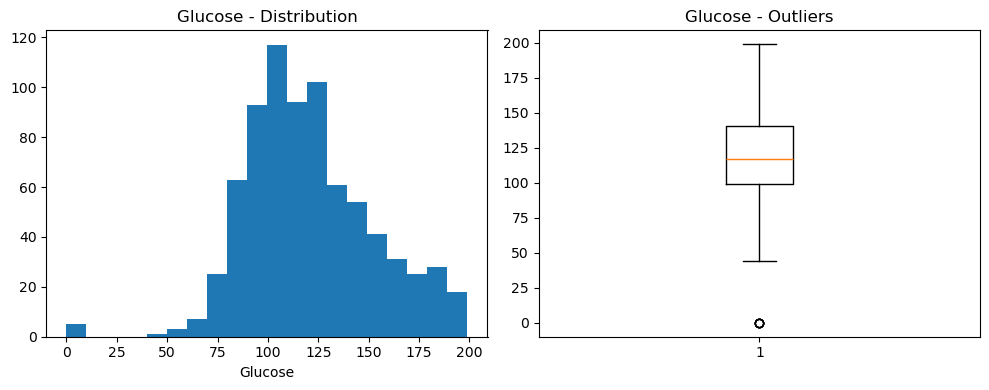

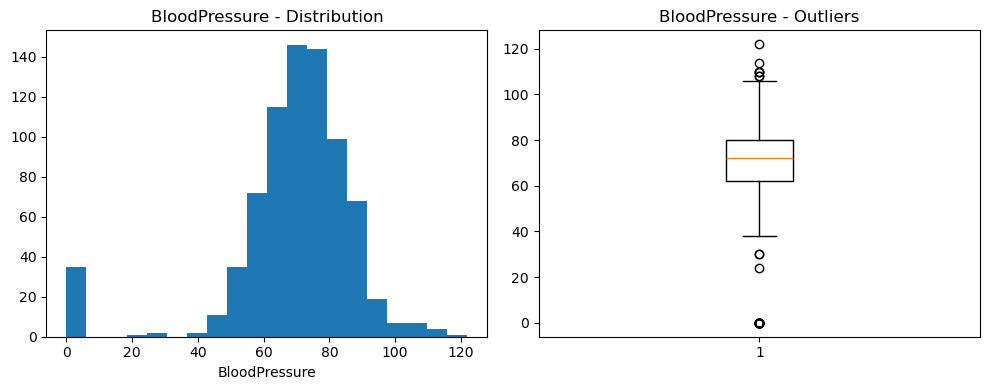

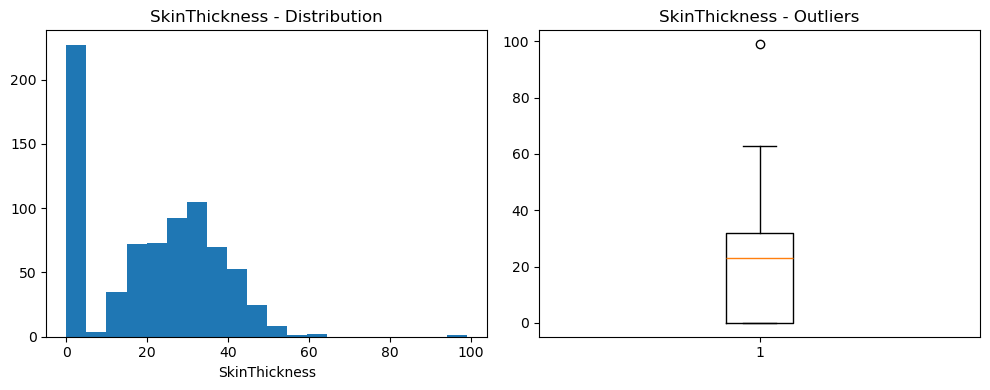

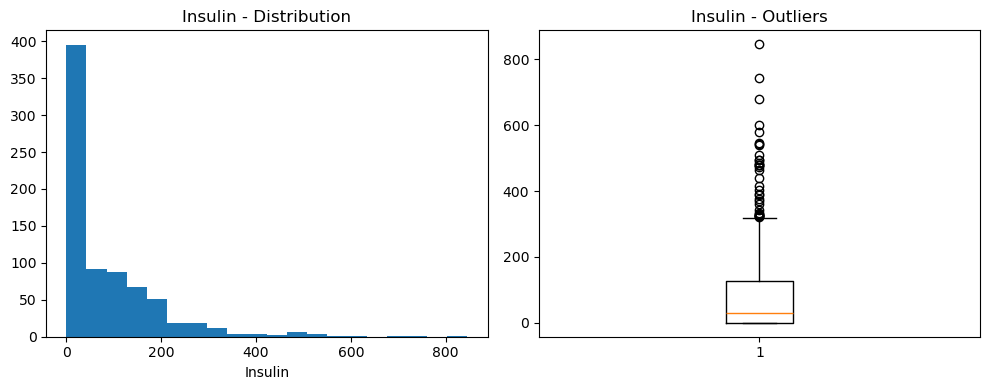

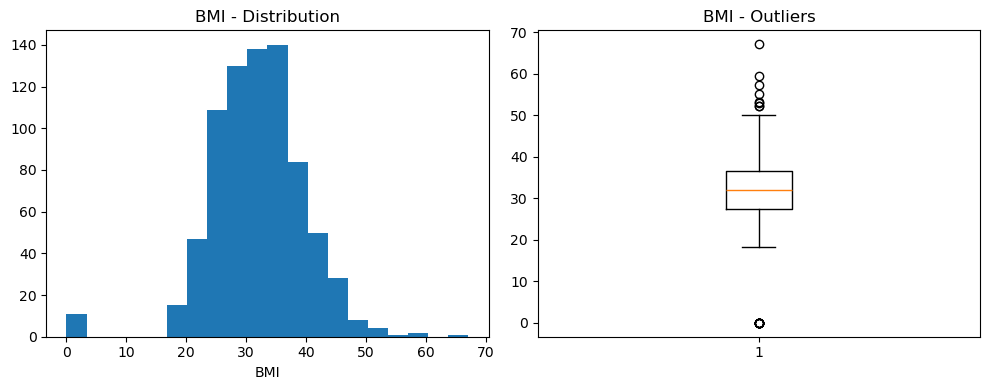

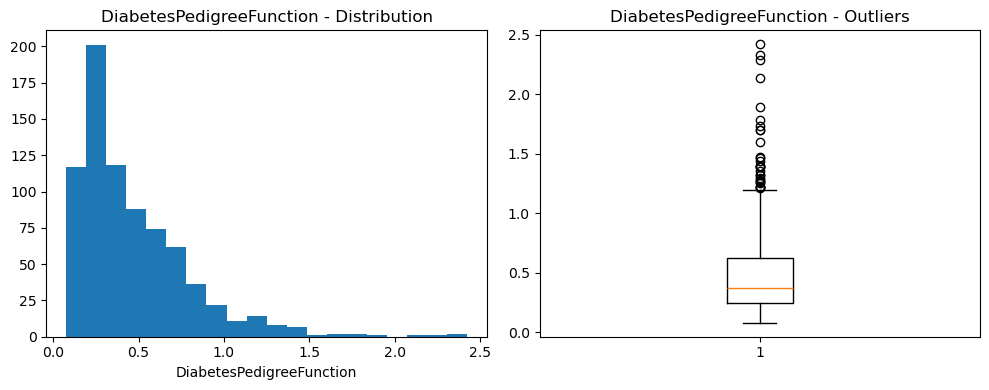

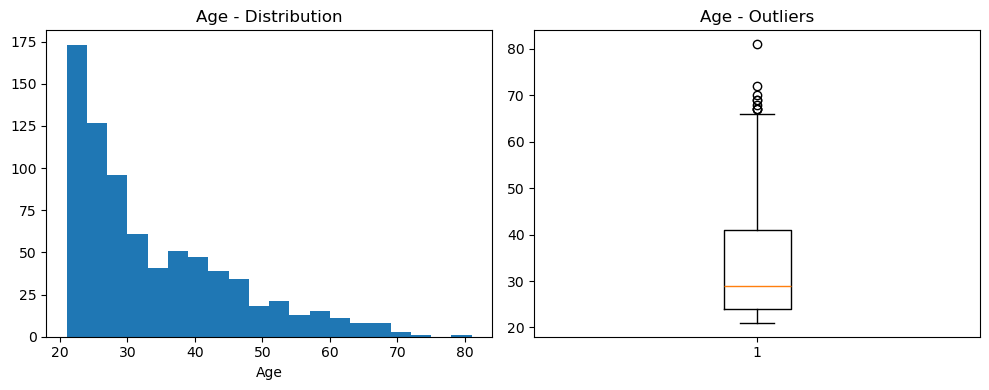

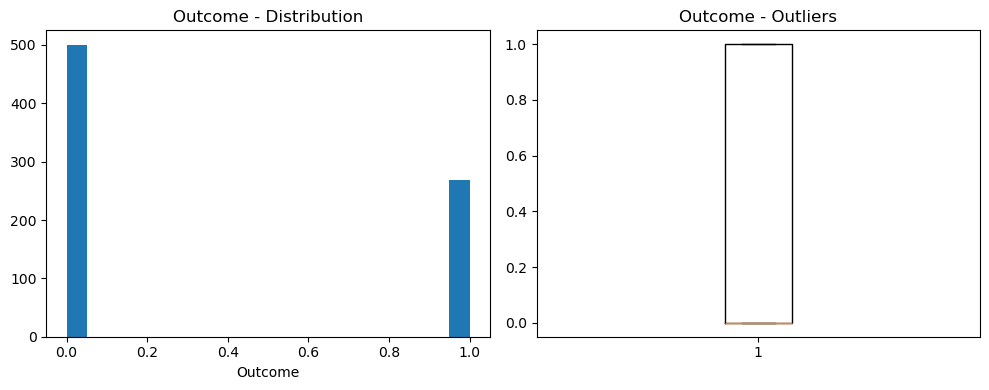

In [11]:
# Checking the distribution and outliers of all columns 
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    plt.figure(figsize=(10,4))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=20)
    plt.title(f"{col} - Distribution")
    plt.xlabel(col)

    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col])
    plt.title(f"{col} - Outliers")

    plt.tight_layout()
    plt.show()


In [12]:
# Plotting the correlation map now

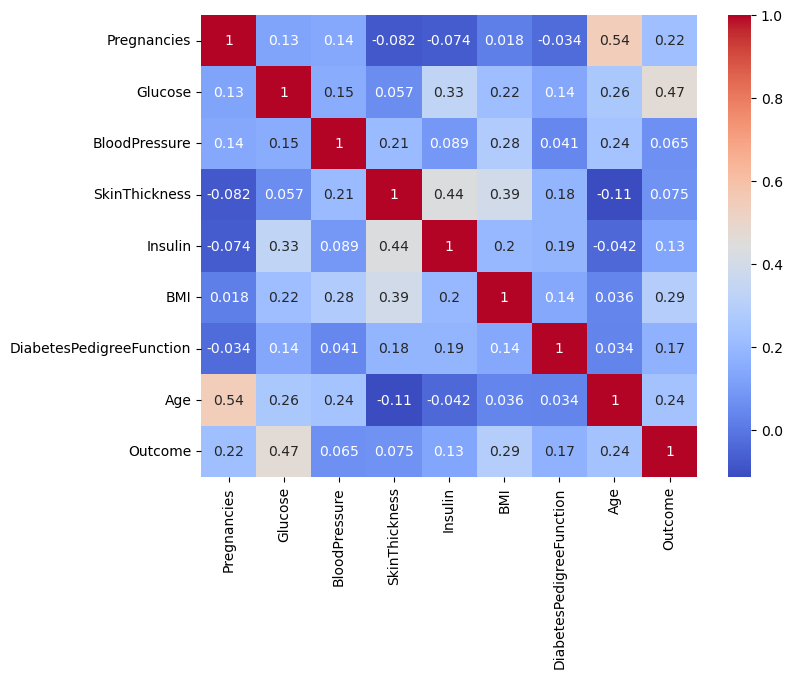

In [15]:
corr = df.corr()
# Heatmap for visualization
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [19]:
# The correlation map checks that some column has low relation with target but we will
# handle the zero's in rows after that will check the relation again

In [20]:
# replacing the zero's with nan so then will fill it logically
cols_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [21]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [22]:
# As we had already checked the data is skewed so better to fill with median
imputer = SimpleImputer(strategy='median')
df[cols_with_zero] = imputer.fit_transform(df[cols_with_zero])

In [23]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
df[df["Glucose"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [25]:
df[df["DiabetesPedigreeFunction"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


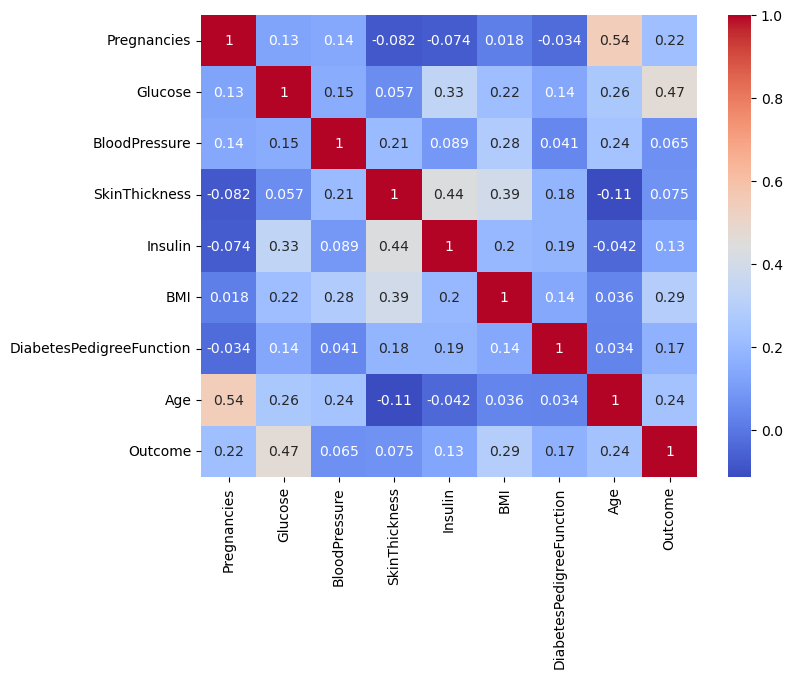

In [26]:
# So We have successfully handle the zero value now checking the relation again
corr_2 = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

As The Missing , Zero Values are handle so we can now successfully moving To Model Training

# ML BEGINS HERE

In [28]:
# Splitting the Data 
X = df.drop("Outcome" , axis=1)
Y = df["Outcome"]
np.random.seed(42)

In [32]:
X_train , X_test , y_train , y_test  = train_test_split(X,Y,test_size=0.2 , random_state=42)

In [49]:
# Now Training on Different Models
models={
    "LogisticRegression":LogisticRegression(random_state=24, max_iter=1000, class_weight="balanced"),
    "RandomForestClassifier":RandomForestClassifier(class_weight="balanced" , random_state=42)
}

Scores = []

for name , model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)


    
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test , y_pred))
    
    
    

LogisticRegression Accuracy: 0.7013
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        99
           1       0.57      0.71      0.63        55

    accuracy                           0.70       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.70      0.71       154

RandomForestClassifier Accuracy: 0.7597
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



# HYPER TUNNING THE RANDOM FOREST MODEL TO INCREASE ITS RECALL AND OTHER PERFORMANCE

In [50]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    scoring='f1',  # focus on F1 to balance precision and recall
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
 
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred_best = best_rf.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Best Parameters: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 500}
Tuned Model Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.88      0.72      0.79        99
           1       0.62      0.82      0.70        55

    accuracy                           0.75       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.78      0.75      0.76       154



In [51]:
# The Accuracy Slightly droped but the Recall has been increase so in medical model the recall matters alot 

In [52]:
confusion_matrix = confusion_matrix(y_test, y_pred_best)

In [53]:
confusion_matrix

array([[71, 28],
       [10, 45]])

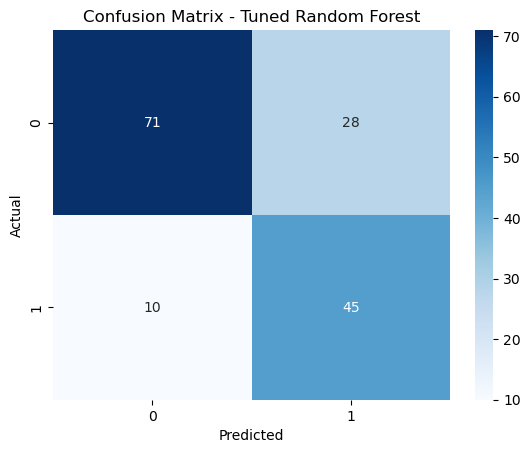

In [54]:
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.show()

# Making Prediction With REAL Data (Online)

In [55]:
# Sample data
test_data = [
    [6, 148, 72, 35, 0, 33.6, 0.627, 50],
    [1, 85, 66, 29, 0, 26.6, 0.351, 31],
    [8, 183, 64, 0, 0, 23.3, 0.672, 32],
    [1, 89, 66, 23, 94, 28.1, 0.167, 21],
    [0, 137, 40, 35, 168, 43.1, 2.288, 33]
]

# Column names
columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"
]

df_test = pd.DataFrame(test_data, columns=columns)
y_pred = best_rf.predict(df_test)
print("Predictions:", y_pred)

Predictions: [1 0 1 0 1]


In [56]:
# All the Prediction is correct Now we can save the model

# Saving The Model

In [58]:
joblib.dump(best_rf, "diabetes_predictor_model.pkl")
print("Model saved successfully!")

Model saved successfully!
